In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure
from pathlib import Path
import os
import wave
import keras
import seaborn as sns
import librosa
import soundfile as sf
from google.colab import drive
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from numpy import mean
from numpy import std
import tensorflow as tf
from numpy import dstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical
from scipy.io import wavfile
from tqdm import tqdm
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.applications import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from datetime import date
today = date.today()
f_date=today.strftime("%d_%m_%y")
#os.mkdir("/content/gdrive/My Drive/all_disease_classification/train_on_"+(f_date))
new_loc="/content/gdrive/My Drive/all_disease_classification/train_on_"+(f_date)

In [3]:
import scipy
sig_dict = scipy.io.loadmat('/content/gdrive/MyDrive/all_disease_classification/7class_train_img.mat')
X=sig_dict['train_img']

In [4]:
labels=pd.read_excel('/content/gdrive/MyDrive/all_disease_classification/Labels.xlsx',header=None)
labels.columns=["Lung Sound"]
class_label_onehot=pd.get_dummies(labels)
Y=np.array(class_label_onehot);
print(X.shape)
print(Y.shape)

(18906, 64, 64, 3)
(18906, 7)


In [5]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=100, 
    min_delta=0.001, 
    mode='max'
)

In [6]:
def mobile_inception(dim, output_neurons, output_activation):
    print("\nTRAINING ON Lightweight MODEL:-")

    
    def block(x, filters, reps):
        for _ in range(reps):
            # for low-level features
            t1 = Conv2D(filters[0], kernel_size = (1,1))(x)
            t1 = LeakyReLU()(t1)

            # for mid-level features
            t2 = DepthwiseConv2D(kernel_size = (3,3), strides = 1, padding = 'same')(x)
            t2 = LeakyReLU()(t2)
            t2 = Conv2D(filters[1], kernel_size = (1,1))(t2)
            t2 = LeakyReLU()(t2)

            # for high-level features
            t3 = DepthwiseConv2D(kernel_size = (5,5), strides = 1, padding = 'same')(x)
            t3 = LeakyReLU()(t3)
            t3 = Conv2D(filters[2], kernel_size = (1,1))(t3)
            t3 = LeakyReLU()(t3)

            # for most-significant features
            t4 = MaxPool2D(pool_size = (3,3), strides = 1, padding = 'same')(x)
            t4 = Conv2D(filters[3], kernel_size = (1,1))(t4)
            t4 = LeakyReLU()(t4)

            x = Concatenate()([t1, t2, t3, t4])
        
        return x
        
        
    input = Input(shape = dim)
    
    k = 16
    
    x = Conv2D(filters = k, kernel_size = (3,3), strides = 2, padding = 'same')(input)
    x = LeakyReLU()(x)
    x = MaxPool2D(pool_size = (3,3), strides = 2, padding = 'same')(x)
    
    x = DepthwiseConv2D(kernel_size = (3,3), strides = 1, padding = 'same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(filters = 2*k, kernel_size = (1,1))(x)
    x = LeakyReLU()(x)
    x = MaxPool2D(pool_size = (2,2), strides = 2)(x)
    
    x = block(x, [k, k, k, k], reps = 2)
    x = MaxPool2D(pool_size = (2,2), strides = 2)(x)
        
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    x=  Dense(40, 'relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(output_neurons, output_activation)(x)
    
    model = Model(inputs = input, outputs = output)    
    
    return model

In [7]:
dim = (64,64,3)
output_neurons = 7
output_activation = 'softmax'
from keras import backend as Ke
Ke.clear_session()
model = mobile_inception(dim, output_neurons, output_activation)
#model.summary()
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


TRAINING ON Lightweight MODEL:-


Random_seed_value== 12
Fold--------------> 1

TRAINING ON Lightweight MODEL:-
Epoch 1/400
60/60 [==============================] - 9s 36ms/step - loss: 1.7105 - accuracy: 0.3489 - val_loss: 1.6229 - val_accuracy: 0.3931
Epoch 2/400
60/60 [==============================] - 1s 17ms/step - loss: 1.5799 - accuracy: 0.3851 - val_loss: 1.4907 - val_accuracy: 0.4036
Epoch 3/400
60/60 [==============================] - 1s 17ms/step - loss: 1.3986 - accuracy: 0.4304 - val_loss: 1.2880 - val_accuracy: 0.4988
Epoch 4/400
60/60 [==============================] - 1s 17ms/step - loss: 1.2357 - accuracy: 0.5044 - val_loss: 1.1576 - val_accuracy: 0.5088
Epoch 5/400
60/60 [==============================] - 1s 17ms/step - loss: 1.0998 - accuracy: 0.5673 - val_loss: 0.9669 - val_accuracy: 0.6228
Epoch 6/400
60/60 [==============================] - 1s 17ms/step - loss: 0.9864 - accuracy: 0.6156 - val_loss: 0.8290 - val_accuracy: 0.6763
Epoch 7/400
60/60 [==============================] - 1s 17ms/step - lo

<Figure size 432x288 with 0 Axes>

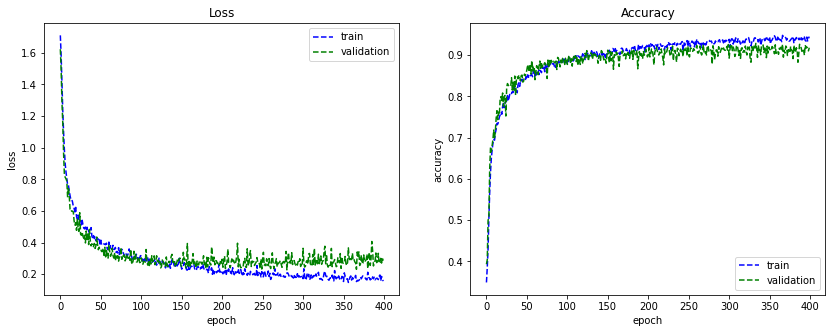

8/8 [==============================] - 0s 16ms/step - loss: 0.2632 - accuracy: 0.9201
Test loss: 0.2631824016571045
Test accuracy: 0.9201480746269226
8/8 [==============================] - 0s 8ms/step


1891it [00:00, 15241.79it/s]

Confusion Matrix
[[246   0   0   2  40   1   0]
 [  1  89   0   2   7   4   1]
 [  0   0  60   3   0   4   5]
 [ 10   0   1 606  10   7   0]
 [  9   0   0   0 417   0   0]
 [  4   0   2   3   8 236   9]
 [  1   0   3   3   5   6  86]]


<Figure size 432x288 with 0 Axes>

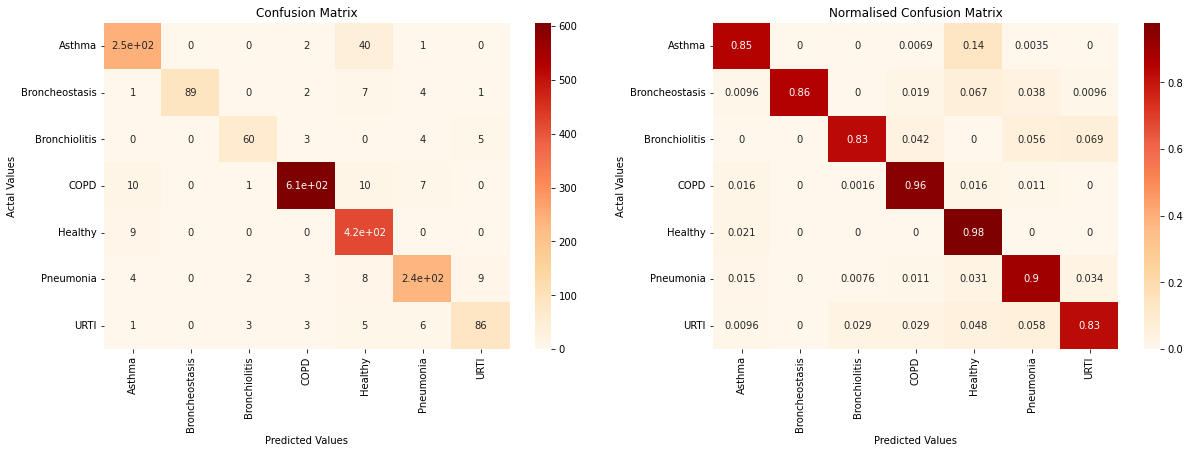

                precision    recall  f1-score   support

        Asthma       0.91      0.85      0.88       289
Broncheostasis       1.00      0.86      0.92       104
 Bronchiolitis       0.91      0.83      0.87        72
          COPD       0.98      0.96      0.97       634
       Healthy       0.86      0.98      0.91       426
     Pneumonia       0.91      0.90      0.91       262
          URTI       0.85      0.83      0.84       104

      accuracy                           0.92      1891
     macro avg       0.92      0.89      0.90      1891
  weighted avg       0.92      0.92      0.92      1891

Random_seed_value== 2
Fold--------------> 2

TRAINING ON Lightweight MODEL:-
Epoch 1/400
60/60 [==============================] - 3s 27ms/step - loss: 1.7264 - accuracy: 0.3408 - val_loss: 1.5984 - val_accuracy: 0.3948
Epoch 2/400
60/60 [==============================] - 1s 18ms/step - loss: 1.5533 - accuracy: 0.3989 - val_loss: 1.3877 - val_accuracy: 0.4653
Epoch 3/400
60/60 [=

<Figure size 432x288 with 0 Axes>

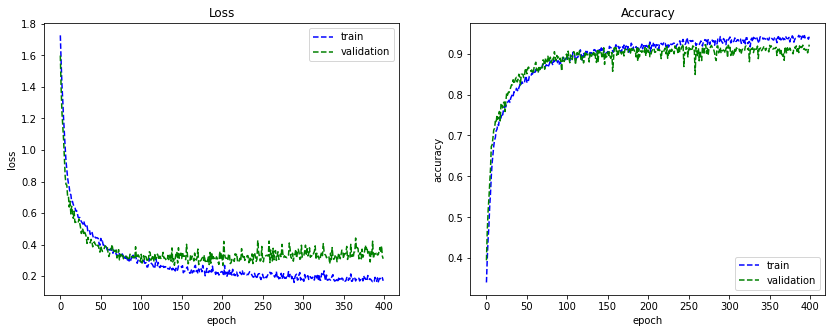

8/8 [==============================] - 0s 10ms/step - loss: 0.2442 - accuracy: 0.9291
Test loss: 0.24420471489429474
Test accuracy: 0.9291380047798157
8/8 [==============================] - 0s 9ms/step


1891it [00:00, 15421.70it/s]

Confusion Matrix
[[256   0   0   2  26   0   0]
 [  0  94   0   1   4   5   0]
 [  0   0  75   2   1   4   7]
 [ 11   1   1 595   9   6   3]
 [ 13   0   1   5 412   1   1]
 [  1   0   4   2   5 232   3]
 [  0   0   2   1   3   9  93]]


<Figure size 432x288 with 0 Axes>

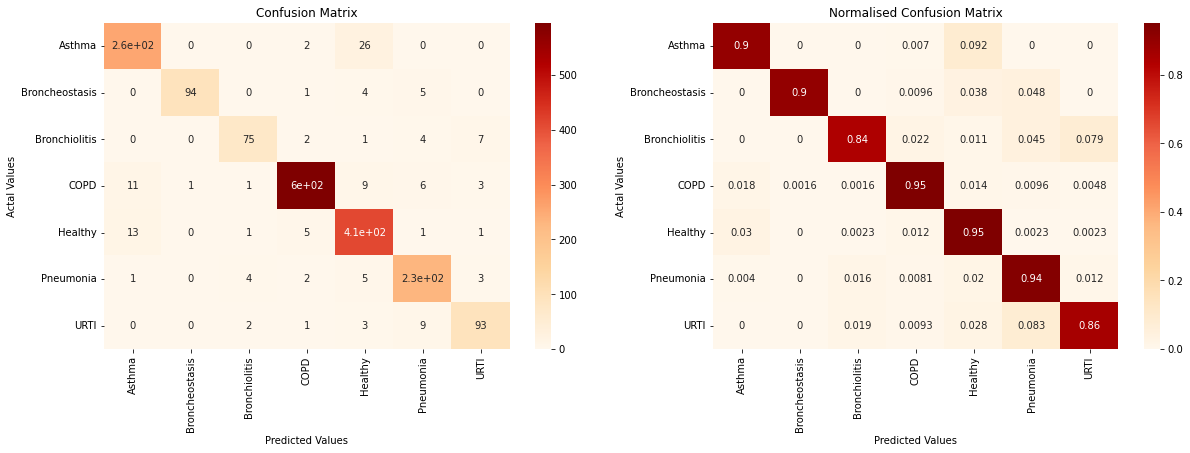

                precision    recall  f1-score   support

        Asthma       0.91      0.90      0.91       284
Broncheostasis       0.99      0.90      0.94       104
 Bronchiolitis       0.90      0.84      0.87        89
          COPD       0.98      0.95      0.96       626
       Healthy       0.90      0.95      0.92       433
     Pneumonia       0.90      0.94      0.92       247
          URTI       0.87      0.86      0.87       108

      accuracy                           0.93      1891
     macro avg       0.92      0.91      0.91      1891
  weighted avg       0.93      0.93      0.93      1891

Random_seed_value== 5
Fold--------------> 3

TRAINING ON Lightweight MODEL:-
Epoch 1/400
60/60 [==============================] - 3s 27ms/step - loss: 1.7048 - accuracy: 0.3509 - val_loss: 1.5746 - val_accuracy: 0.3901
Epoch 2/400
60/60 [==============================] - 1s 19ms/step - loss: 1.5397 - accuracy: 0.3794 - val_loss: 1.4506 - val_accuracy: 0.4095
Epoch 3/400
60/60 [=

<Figure size 432x288 with 0 Axes>

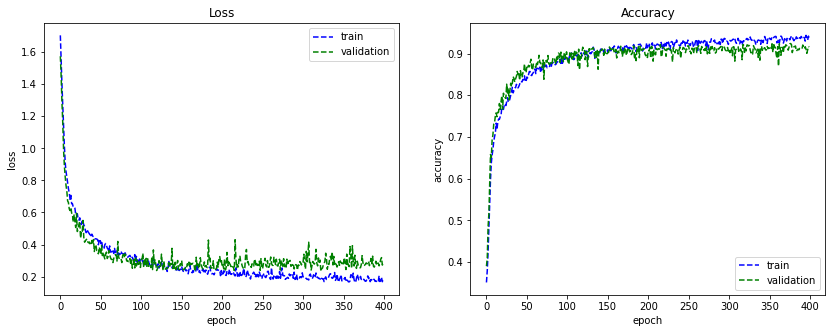

8/8 [==============================] - 0s 12ms/step - loss: 0.2527 - accuracy: 0.9244
Test loss: 0.25274237990379333
Test accuracy: 0.9243786334991455
8/8 [==============================] - 0s 10ms/step


1891it [00:00, 14424.14it/s]


Confusion Matrix
[[236   0   0   3  21   2   0]
 [  2  89   0   2   1   5   0]
 [  0   0  73   2   0   4  10]
 [  8   4   3 609   8   2   1]
 [ 10   0   0   6 403   2   5]
 [  5   5   1   1   2 239  16]
 [  0   0   4   1   6   1  99]]


<Figure size 432x288 with 0 Axes>

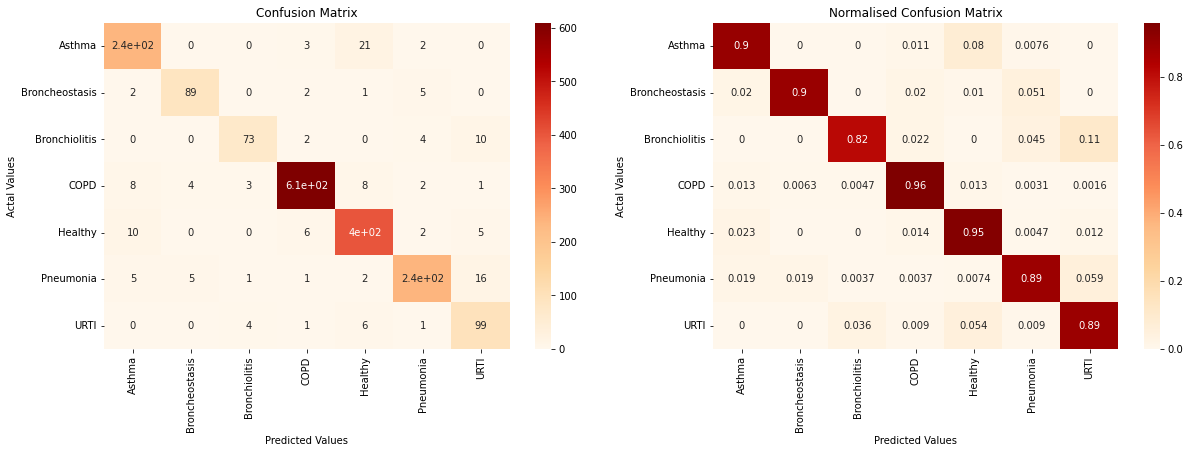

                precision    recall  f1-score   support

        Asthma       0.90      0.90      0.90       262
Broncheostasis       0.91      0.90      0.90        99
 Bronchiolitis       0.90      0.82      0.86        89
          COPD       0.98      0.96      0.97       635
       Healthy       0.91      0.95      0.93       426
     Pneumonia       0.94      0.89      0.91       269
          URTI       0.76      0.89      0.82       111

      accuracy                           0.92      1891
     macro avg       0.90      0.90      0.90      1891
  weighted avg       0.93      0.92      0.92      1891



In [8]:
from pytz import timezone 
from datetime import datetime
import random
from datetime import datetime
import seaborn as sns
from sklearn.metrics import classification_report
id=[12,2,5];batch=256;
for fold in range (3): 
    #p=random.randint(1,42)
    X_train_1=[];X_test=[];Y_train_1=[];Y_test=[];X_train=[];X_val=[];Y_train=[];Y_val=[];
    p=id[fold]
    print('Random_seed_value== '+str(p))
    X_train_1,X_test,Y_train_1,Y_test=train_test_split(X,Y,test_size=0.1,random_state=p)
    X_train,X_val,Y_train,Y_val=train_test_split(X_train_1,Y_train_1,test_size=0.1,random_state=p)
    print("================================================================================================")
    print(f'Fold--------------> {fold+1}')
    from keras import backend as Ke
    Ke.clear_session()
    model = mobile_inception(dim, output_neurons, output_activation)
    opt =tf.keras.optimizers.Adam(learning_rate=0.008) 
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

    history = model.fit(X_train, Y_train, batch_size=batch, epochs=400, verbose=1,validation_data=(X_val, Y_val))#,callbacks=[custom_early_stopping])    
    plt.figure(fold+1)
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    plt.plot(history.history['loss'],'b--')
    plt.plot(history.history['val_loss'],'g--')
    plt.title('Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='best')
 
    plt.subplot(122)
    plt.plot(history.history['accuracy'],'b--')
    plt.plot(history.history['val_accuracy'],'g--')
    plt.title('Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()   

    results=model.evaluate(X_test,Y_test,batch_size=batch,verbose=1)
    print('Test loss:', results[0])
    print('Test accuracy:', results[1])

    predicted=model.predict(X_test,batch_size=batch,verbose=1)
    Y_pred=predicted.argmax(axis=-1)
    Y_pred=predicted.argmax(axis=-1)
    Y_predicted=pd.DataFrame(Y_test,columns=['Asthma','Broncheostasis','Bronchiolitis','COPD','Healthy','Pneumonia','URTI'])
    Y_ori=[];Asthma_t=0;Broncheostasis_t=0;Bronchiolitis_t=0;COPD_t=0;Healthy_t=0;Pneumonia_t=0;URTI_t=0;
    for index,row in tqdm(Y_predicted.iterrows()):
        if row['Asthma']==1:
          Asthma_t=Asthma_t+1
          Y_ori.append(0)
        elif row['Broncheostasis']==1:
          Broncheostasis_t=Broncheostasis_t+1
          Y_ori.append(1)
        elif row['Bronchiolitis']==1:
          Bronchiolitis_t=Bronchiolitis_t+1
          Y_ori.append(2)
        elif row['COPD']==1:
          COPD_t=COPD_t+1
          Y_ori.append(3)
        elif row['Healthy']==1:
          Healthy_t=Healthy_t+1
          Y_ori.append(4)
        elif row['Pneumonia']==1:
          Pneumonia_t=Pneumonia_t+1
          Y_ori.append(5)
        elif row['URTI']==1:
          URTI_t=URTI_t+1
          Y_ori.append(6)

    cm=confusion_matrix(Y_ori,Y_pred)
    cm_norm=confusion_matrix(Y_ori,Y_pred,normalize='true')
    print('Confusion Matrix');
    print(cm)
    
    cm_df = pd.DataFrame(cm,index = ['Asthma','Broncheostasis','Bronchiolitis','COPD','Healthy','Pneumonia','URTI'], columns = ['Asthma','Broncheostasis','Bronchiolitis','COPD','Healthy','Pneumonia','URTI'])
    plt.figure(100+fold)
    plt.figure(figsize=(20,6))
    plt.subplot(121)
    sns.heatmap(cm_df,annot=True,cmap="OrRd")
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    
    cm_df_norm = pd.DataFrame(cm_norm, index = ['Asthma','Broncheostasis','Bronchiolitis','COPD','Healthy','Pneumonia','URTI'],  columns = ['Asthma','Broncheostasis','Bronchiolitis','COPD','Healthy','Pneumonia','URTI'])
    plt.subplot(122)
    sns.heatmap(cm_df_norm,annot=True,cmap="OrRd")
    plt.title('Normalised Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    target_names = ['Asthma','Broncheostasis','Bronchiolitis','COPD','Healthy','Pneumonia','URTI']
    print(classification_report(Y_ori, Y_pred, target_names=target_names))
    
    ind_time = datetime.now(timezone("Asia/Kolkata")).strftime('%Y_%m_%d_%H_%M_%S')

    # save the plot varriables
    train_loss=history.history['loss']; filepath_tloss=new_loc+'/train_loss_fold_'+ str(fold+1)+'_'+str(ind_time)+'.txt'; np.savetxt(filepath_tloss,train_loss)
    val_loss=history.history['val_loss']; filepath_vloss=new_loc+'/val_loss_fold_'+ str(fold+1)+'_'+str(ind_time)+'.txt'; np.savetxt(filepath_vloss,val_loss)
    acc=history.history['accuracy'];      filepath_tacc=new_loc+'/train_acc_fold_'+ str(fold+1) +'_'+str(ind_time)+'.txt'; np.savetxt(filepath_tacc,acc)
    val_acc=history.history['val_accuracy']; filepath_vacc=new_loc+'/val_acc_fold_'+ str(fold+1)+'_'+str(ind_time)+'.txt'; np.savetxt(filepath_vacc,val_acc)
    # save model
    model.save_weights(new_loc+'/fold_'+str(fold+1)+'_'+str(ind_time)+'.h5')
    print("================================================================================================")
